# Source and description of the data set 
### https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings 
###          (Selling video games with ratings provided by Kaggle)

#### This dataset has the following columns: Name of Game, Platform, Year Released, Genre, Publisher, NA Sales, EU Sales, JP Sales, Other Sales, Global_Sales.

| column name| column name |
|:-------|:-------|
|Critic_score|Aggregate score compiled by Metacritic staff|
|Criticcount|The number of critics used in coming up with the Criticscore|
|User_score|Score by Metacritic's subscribers|
|Usercount| Number of users who gave the userscore|
|Developer|Party responsible for creating the game|
|Rating|The <span style="color:red">ESRB</span> ratings|


##### <span style="color:red">ESRB</span> : The Entertainment Software Rating Board (ESRB) is a game rating review system used in the United States and Canada.

## Objective Setting
### We would like to find out the relationship between sales by region and sales around the world.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import sys
sys.path.append("/Users/unixking/Desktop/데이터과학/팀프로젝트/")
import ds_pro


In [62]:
data = pd.read_csv("/Users/unixking/Desktop/데이터과학/팀프로젝트/Video_Games_Sales_as_at_22_Dec_2016.csv")
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Data exploration

In [63]:
data = data.iloc[:,0:10]    #You only need up to column 10 to analyze data on a topic.

data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [64]:
ds_pro.exploation(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB
None
---------- data basic statistics ----------
       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.8135

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64


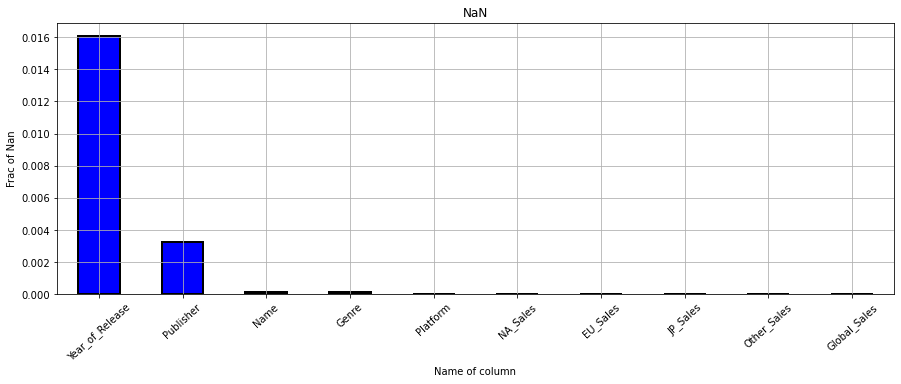

In [65]:
ds_pro.nul(data)

In [4]:
data = data.dropna()    #It was judged that the absence of about 300 out of 16719 data did not significantly impede data analysis.
data = data.reset_index(drop=True)

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64


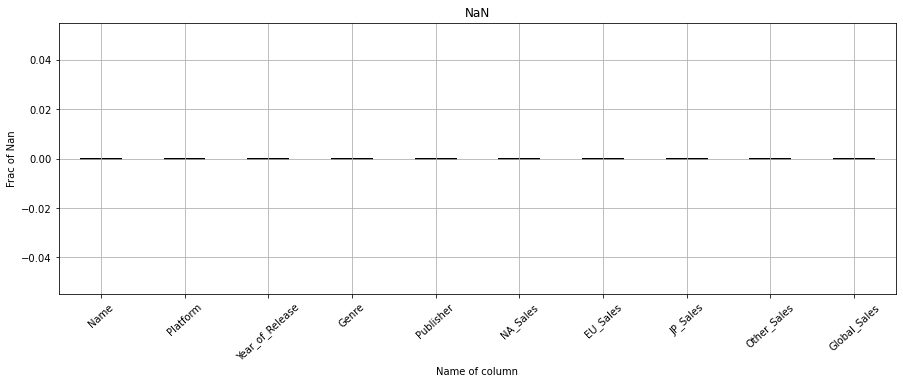

In [9]:
ds_pro.nul(data)

## EDA analysis through visualization

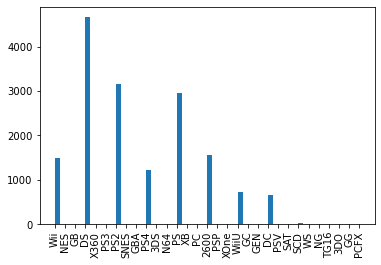

In [10]:
plt.hist(data['Platform'],width = 0.5)  #(Nintendo) You can see that the DS platform has the most
plt.xticks(rotation = 90)
plt.show()

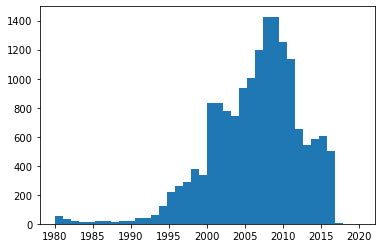

In [11]:
plt.hist(data['Year_of_Release'],width = 1,bins = 38)
plt.show()

### It gradually increased from the 1990s, rose sharply after 2000, and was the most popular in 2010, 
### but it is on a declining trend as it approaches the present time.

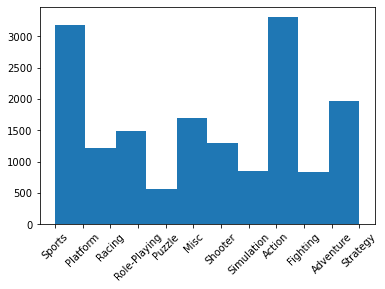

In [12]:
plt.hist(data['Genre'], width = 1.1)     #Among the game genres, the action genre is the most popular.
plt.xticks(rotation = 45)
plt.show()

In [13]:
ds_pro.go_pie(data, 'Genre')


In [14]:
genre_sales = data.groupby('Genre')['Global_Sales'].agg(['sum'])
genre_sales.columns = ['Sales_by_Genre']
top5=genre_sales.sort_values(by="Sales_by_Genre", ascending=False).head(5) #Assign the top 5 most popular to a variable called top5
top5

,Sales_by_Genre
Genre,
Action,1717.62
Sports,1310.39
Shooter,1041.83
Role-Playing,930.90
Platform,825.86


In [15]:
in_top5 = data['Genre'].str.contains("Action|Sports|Shooter|Role-Playing|Platform")
top5_genre=data[in_top5] # Pick only those that are publishers in the top 20
top5_genre

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
...,...,...,...,...,...,...,...,...,...,...
16407,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16409,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16411,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16412,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01


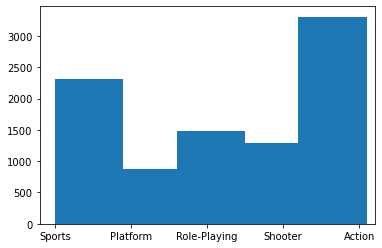

In [16]:
plt.hist(top5_genre['Genre'],bins=5,width=0.9)
plt.show()

In [17]:
action_df = data[data['Genre']=='Action']['Year_of_Release'].value_counts().sort_index()
sports_df = data[data['Genre']=='Sports']['Year_of_Release'].value_counts().sort_index()
role_df = data[data['Genre']=='Role-Playing']['Year_of_Release'].value_counts().sort_index()
shooter_df = data[data['Genre']=='Shooter']['Year_of_Release'].value_counts().sort_index()
platform_df = data[data['Genre']=='Platform']['Year_of_Release'].value_counts().sort_index()

In [18]:
ds_pro.go_plot(action_df, sports_df, role_df, shooter_df, platform_df)


In [19]:
Publisher_sales = data.groupby('Publisher')['Global_Sales'].agg(['sum'])
Publisher_sales.columns = ['Sales_by_Publisher']
top20=Publisher_sales.sort_values(by="Sales_by_Publisher", ascending=False).head(20)
#Assign the top 20 most popular to a variable called top20

In [20]:
in_top20 = data['Publisher'].str.contains("Nintendo|Electronic Arts|Activision|Sony Computer Entertainment|Ubisoft|Take-Two Interactive|THQ|Konami Digital Entertainment|Sega|Namco Bandai Games|Microsoft Game Studios|Capcom|Atari|Square Enix|Warner Bros. Interactive Entertainment|Disney Interactive Studios|Eidos Interactive|Bethesda Softworks")
sample=data[in_top20] # Pick only those that are publishers in the top 20
sample

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16380,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16391,Pony Friends 2,PC,2009.0,Simulation,Eidos Interactive,0.00,0.01,0.00,0.00,0.01
16393,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16398,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01


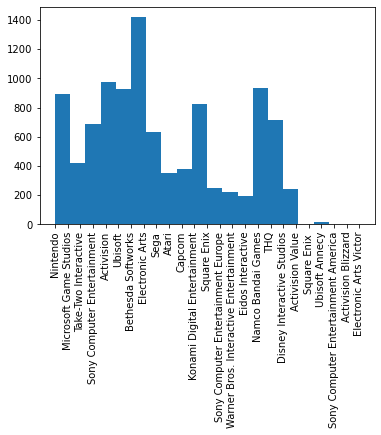

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16411,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16412,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16413,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16414,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [21]:
plt.hist(sample['Publisher'],bins=20,width=1.2) #x: publisher, y: number of products
plt.xticks(rotation = 90)
plt.show()
data

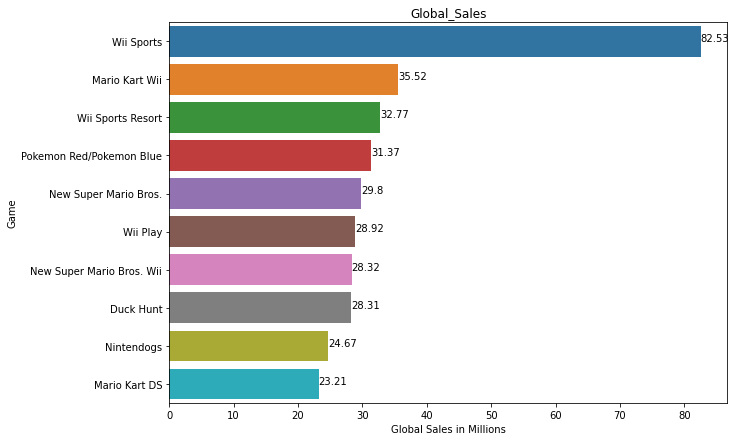

In [22]:
ds_pro.rank_plot(data, 'Name', 'Global_Sales', 10)



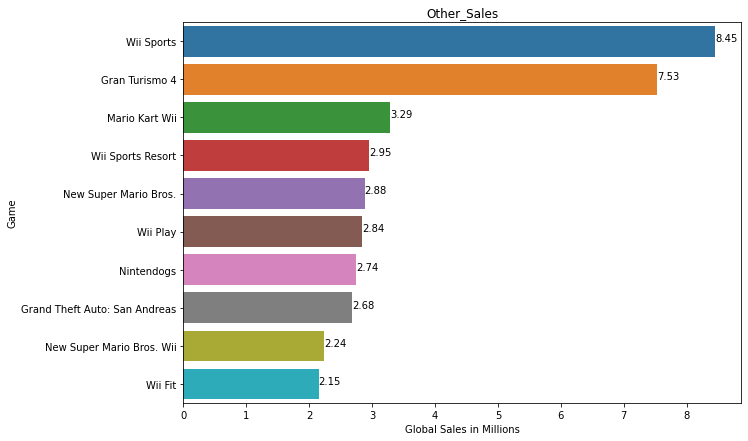

In [23]:
ds_pro.rank_plot(data, 'Name', 'Other_Sales', 10)


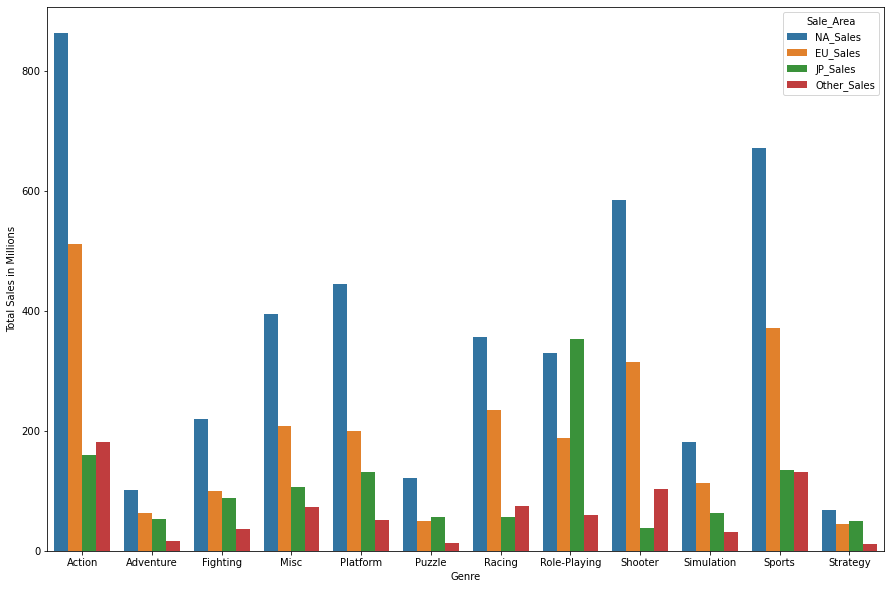

In [24]:
ds_pro.compare_plot(data, 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')


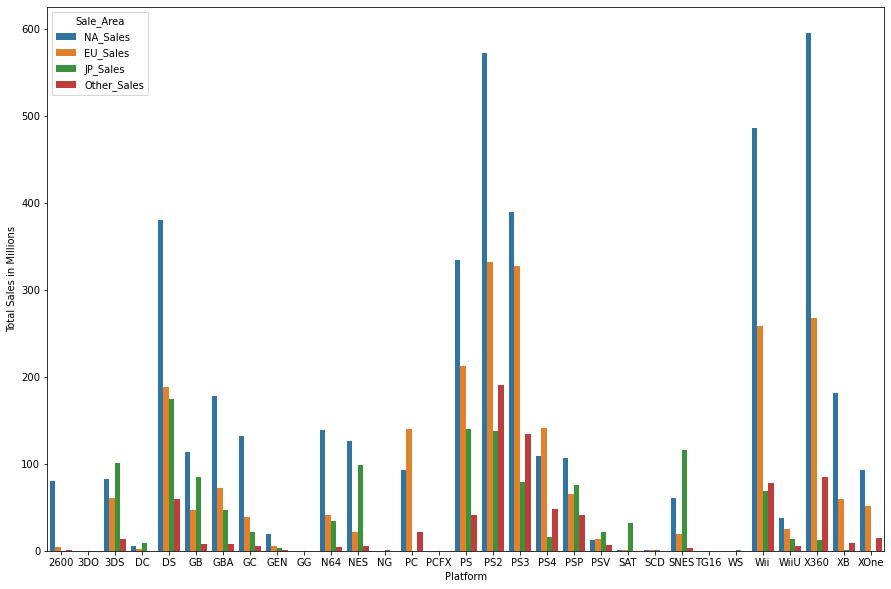

In [25]:
ds_pro.compare_plot(data, 'Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales')


In [26]:
Platform_le = LabelEncoder()
Platform_le.fit(data.Platform)
data['Platform'] = Platform_le.transform(data.Platform)

In [27]:
Platform_le.classes_

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [5]:
Genre_le = LabelEncoder()
Genre_le.fit(data.Genre)
data['Genre'] = Genre_le.transform(data.Genre)

In [6]:
Genre_le.classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [7]:
Publisher_le = LabelEncoder()
Publisher_le.fit(data.Publisher)
data['Publisher'] = Publisher_le.transform(data.Publisher)

In [8]:
Publisher_le.classes_

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [9]:
Sscale_Global_Sales, Oother_scale_scale = ds_pro.standard_scale(data, 'Global_Sales', 'Other_Sales')

Sscale_Global_Sales = pd.DataFrame(Sscale_Global_Sales,columns=['Sscale_Global_Sales'])
Oother_scale_scale = pd.DataFrame(Oother_scale_scale,columns=['Oother_scale'])
data['Sscale_Global_Sales'] = Sscale_Global_Sales
data['Oother_scale_scale'] = Oother_scale_scale

In [10]:
Mscale_Global_Sales, Oother_minmax_scale = ds_pro.minmax_scale(data, 'Global_Sales', 'Other_Sales')

Mscale_Global_Sales = pd.DataFrame(Mscale_Global_Sales,columns=['Mscale_Global_Sales'])
Oother_minmax_scale = pd.DataFrame(Oother_minmax_scale,columns=['Oother_minmax_scale'])
data['Mscale_Global_Sales'] = Mscale_Global_Sales
data['Oother_minmax_scale'] = Oother_minmax_scale

In [11]:
Sscale_Global_Sales, Oother_scale_scale = ds_pro.robust_scale(data, 'Global_Sales', 'Other_Sales')

Sscale_Global_Sales = pd.DataFrame(Sscale_Global_Sales,columns=['Sscale_Global_Sales'])
Oother_scale_scale = pd.DataFrame(Oother_scale_scale,columns=['Oother_scale'])
data['Rscale_Global_Sales'] = Sscale_Global_Sales
data['Oother_robust_scale'] = Oother_scale_scale


(0.0, 4.0, 0.0, 3.0)

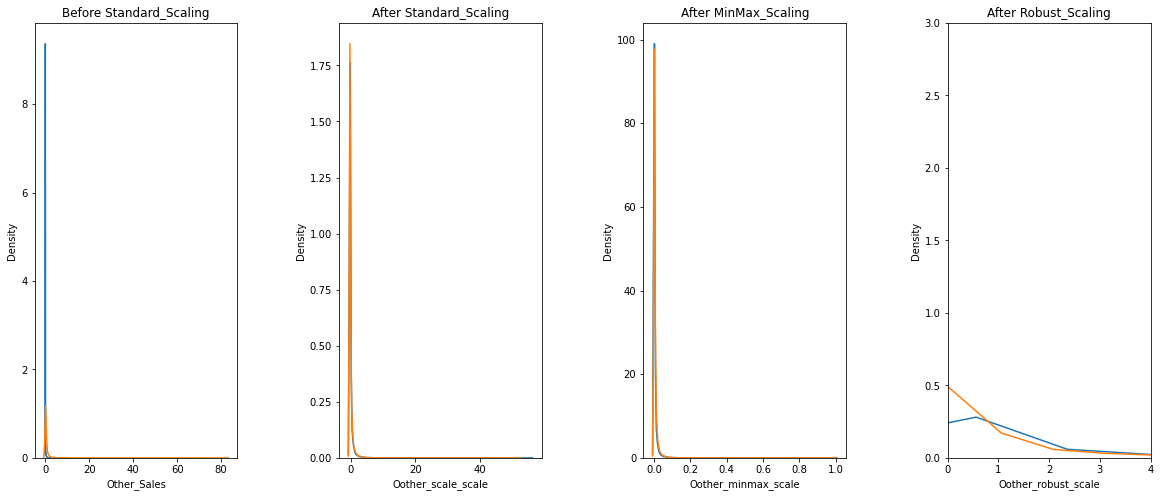

In [12]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(20,8))
fig.subplots_adjust(wspace=0.5)

ax1.set_title('Before Standard_Scaling')
sns.kdeplot(data['Other_Sales'],ax=ax1)
sns.kdeplot(data['Global_Sales'],ax=ax1)

ax2.set_title('After Standard_Scaling')
sns.kdeplot(data['Oother_scale_scale'],ax=ax2)
sns.kdeplot(data['Sscale_Global_Sales'],ax=ax2)

ax3.set_title('After MinMax_Scaling')
sns.kdeplot(data['Oother_minmax_scale'],ax=ax3)
sns.kdeplot(data['Mscale_Global_Sales'],ax=ax3)

ax4.set_title('After Robust_Scaling')
sns.kdeplot(data['Oother_robust_scale'],ax=ax4)
sns.kdeplot(data['Rscale_Global_Sales'],ax=ax4)
plt.axis([0, 4, 0, 3])

In [13]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sscale_Global_Sales,Oother_scale_scale,Mscale_Global_Sales,Oother_minmax_scale,Rscale_Global_Sales,Oother_robust_scale
0,Wii Sports,Wii,2006.0,10,361,41.36,28.96,3.77,8.45,82.53,52.565293,44.657443,1.000000,0.799432,200.878049,281.333333
1,Super Mario Bros.,NES,1985.0,4,361,29.08,3.58,6.81,0.77,40.24,25.453487,3.839103,0.487518,0.072848,97.731707,25.333333
2,Mario Kart Wii,Wii,2008.0,6,361,15.68,12.76,3.79,3.29,35.52,22.427530,17.232621,0.430320,0.311258,86.219512,109.333333
3,Wii Sports Resort,Wii,2009.0,10,361,15.61,10.93,3.28,2.95,32.77,20.664525,15.425559,0.396995,0.279092,79.512195,98.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,7,361,11.27,8.89,10.22,1.00,31.37,19.766995,5.061528,0.380029,0.094607,76.097561,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16411,Samurai Warriors: Sanada Maru,PS3,2016.0,0,502,0.00,0.00,0.01,0.00,0.01,-0.337669,-0.253360,0.000000,0.000000,-0.390244,-0.333333
16412,LMA Manager 2007,X360,2006.0,10,91,0.00,0.01,0.00,0.00,0.01,-0.337669,-0.253360,0.000000,0.000000,-0.390244,-0.333333
16413,Haitaka no Psychedelica,PSV,2016.0,1,233,0.00,0.00,0.01,0.00,0.01,-0.337669,-0.253360,0.000000,0.000000,-0.390244,-0.333333
16414,Spirits & Spells,GBA,2003.0,4,547,0.01,0.00,0.00,0.00,0.01,-0.337669,-0.253360,0.000000,0.000000,-0.390244,-0.333333


In [14]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 42)

In [15]:
data_train.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sscale_Global_Sales,Oother_scale_scale,Mscale_Global_Sales,Oother_minmax_scale,Rscale_Global_Sales,Oother_robust_scale
577,ESPN NFL 2K5,PS2,2004.0,10,447,2.15,0.12,0.00,0.36,2.62,1.335583,1.659999,0.031629,0.034059,5.975610,11.666667
4233,Nickelodeon Team Umizoomi,DS,2011.0,0,496,0.42,0.00,0.00,0.03,0.45,-0.055588,-0.093914,0.005332,0.002838,0.682927,0.666667
684,Tomb Raider II,PC,1997.0,0,138,0.91,1.25,0.00,0.13,2.29,1.124022,0.437575,0.027630,0.012299,5.170732,4.000000
6462,Castlevania: Harmony of Dissonance,GBA,2002.0,4,277,0.16,0.06,0.04,0.00,0.26,-0.177396,-0.253360,0.003030,0.000000,0.219512,-0.333333
3785,NBA Live 09,PS3,2008.0,10,139,0.46,0.00,0.02,0.04,0.52,-0.010711,-0.040765,0.006180,0.003784,0.853659,1.000000
9585,PixelJunk Monsters Deluxe,PSP,2010.0,11,457,0.11,0.00,0.00,0.01,0.12,-0.267148,-0.200212,0.001333,0.000946,-0.121951,0.000000
761,Super Mario RPG: Legend of the Seven Stars,SNES,1996.0,7,361,0.66,0.00,1.45,0.03,2.14,1.027859,-0.093914,0.025812,0.002838,4.804878,0.666667
3588,Tony Hawk's Pro Skater 3,XB,2002.0,10,21,0.34,0.18,0.00,0.02,0.55,0.008521,-0.147063,0.006544,0.001892,0.926829,0.333333
16031,Agatha Christie's The ABC Murders,XOne,2016.0,1,323,0.01,0.00,0.00,0.00,0.01,-0.337669,-0.253360,0.000000,0.000000,-0.390244,-0.333333
796,Mario & Luigi: Dream Team,3DS,2013.0,7,361,0.89,0.58,0.46,0.14,2.08,0.989393,0.490724,0.025085,0.013245,4.658537,4.333333


In [16]:
data_test.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Sscale_Global_Sales,Oother_scale_scale,Mscale_Global_Sales,Oother_minmax_scale,Rscale_Global_Sales,Oother_robust_scale
12189,Tron 2.0: Killer App,GBA,2004.0,0,127,0.04,0.02,0.00,0.00,0.06,-0.305614,-0.253360,0.000606,0.000000,-0.268293,-0.333333
2420,Tales of Xillia 2,PS3,2012.0,7,349,0.20,0.12,0.45,0.07,0.84,0.194438,0.118682,0.010058,0.006623,1.634146,2.000000
15847,Totally Spies! Totally Party,PS2,2008.0,3,527,0.01,0.01,0.00,0.00,0.01,-0.337669,-0.253360,0.000000,0.000000,-0.390244,-0.333333
5996,Super Fire ProWrestling X,SNES,1995.0,2,228,0.00,0.00,0.28,0.00,0.28,-0.164574,-0.253360,0.003272,0.000000,0.268293,-0.333333
5094,Star Fox: Zero,WiiU,2016.0,8,361,0.17,0.10,0.07,0.03,0.36,-0.113286,-0.093914,0.004241,0.002838,0.463415,0.666667
12336,Top Gear Hyper-Bike,N64,1999.0,6,271,0.05,0.01,0.00,0.00,0.06,-0.305614,-0.253360,0.000606,0.000000,-0.268293,-0.333333
11230,Gintama Gin-Oh Quest: Gin-San ga Tenshoku Shit...,DS,2007.0,7,63,0.00,0.00,0.08,0.00,0.08,-0.292792,-0.253360,0.000848,0.000000,-0.219512,-0.333333
149,The Last of Us,PS3,2013.0,0,459,2.41,2.18,0.28,0.99,5.87,3.419134,5.008379,0.071013,0.093661,13.902439,32.666667
6634,Butt Ugly Martians: B.K.M. Battles,GBA,2002.0,0,546,0.18,0.07,0.00,0.00,0.25,-0.183806,-0.253360,0.002908,0.000000,0.195122,-0.333333
13069,2002 FIFA World Cup,GC,2002.0,10,139,0.04,0.01,0.00,0.00,0.05,-0.312025,-0.253360,0.000485,0.000000,-0.292683,-0.333333


[]

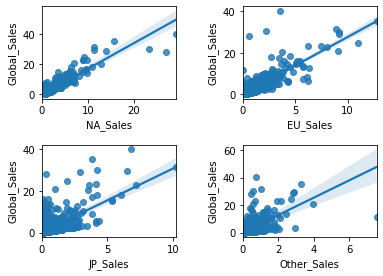

In [17]:
#Just calculate for later comparison
train_predict_na, train_predict_eu, train_predict_jp, train_predict_other = ds_pro.line_reg(data_train, 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales')

#Draw linear regression graph
fig, ax = plt.subplots(ncols=2, nrows=2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
sns.regplot(x="NA_Sales", y="Global_Sales", data=data_train, ax=ax[0][0])
sns.regplot(x="EU_Sales", y="Global_Sales", data=data_train, ax=ax[0][1])
sns.regplot(x="JP_Sales", y="Global_Sales", data=data_train, ax=ax[1][0])
sns.regplot(x="Other_Sales", y="Global_Sales", data=data_train, ax=ax[1][1])
plt.plot()

In [18]:
ds_pro.mse(data_train, 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales')

----------------MSE of train set----------------
Global sales by NA_Sales : 0.2831131993938329
Global sales by EU_Sales : 0.4948710521123267
Global sales by JP_Sales : 1.1870655229366764
Global sales by Other_Sales : 1.0204616202752568
----------------MSE of test set----------------
Global sales by NA_Sales : 0.2831131993938329
Global sales by EU_Sales : 0.4948710521123267
Global sales by JP_Sales : 1.1870655229366764
Global sales by Other_Sales : 1.0204616202752568


In [19]:
#Linear regresssion with Standard scaled data
X_train = data_train.iloc[:,5:9] #NA, EU, JP, Other_Sales
X_test = data_test.iloc[:,5:9]
y_train = data_train[['Sscale_Global_Sales']]
y_test = data_test[['Sscale_Global_Sales']]

ds_pro.stand_line(X_train, X_test, y_train, y_test)

MSE of Standard scaled test set is  0.0486313190083426


In [20]:
X_train = data_train.iloc[:,5:9] #NA, EU, JP, Other_Sales
X_test = data_test.iloc[:,5:9]
y_train = data_train[['Mscale_Global_Sales']]
y_test = data_test[['Mscale_Global_Sales']]

ds_pro.minmax_line(X_train, X_test, y_train, y_test)

MSE of MinMax scaled test set is  5.2425736814386184e-05


In [21]:
X_train = data_train.iloc[:,5:9] #NA, EU, JP, Other_Sales
X_test = data_test.iloc[:,5:9]
y_train = data_train[['Rscale_Global_Sales']]
y_test = data_test[['Rscale_Global_Sales']]

ds_pro.robust_line(X_train, X_test, y_train, y_test)

MSE of Robust scaled test set is  0.009787650905886491


In [22]:
#Between 'NA_Sales' and 'Global_Sales' k-fold line Regression
ds_pro.line_kfold(data_train, 'NA_Sales', 'Global_Sales')


5-fold cv score:  [0.87988433 0.83238196 0.88522613 0.89498388 0.76211238]


In [23]:
#Between 'EU_Sales' and 'Global_Sales' k-fold line Regression
ds_pro.line_kfold(data_train, 'EU_Sales', 'Global_Sales')

5-fold cv score:  [0.8364541  0.80810412 0.84238645 0.75364582 0.58980237]


In [24]:
#Between 'JP_Sales' and 'Global_Sales' k-fold line Regression
ds_pro.line_kfold(data_train, 'JP_Sales', 'Global_Sales')

5-fold cv score:  [0.19920289 0.46377804 0.41753558 0.5197861  0.37044717]


In [25]:
#Between 'JP_Sales' and 'Global_Sales' k-fold line Regression
ds_pro.line_kfold(data_train, 'Other_Sales', 'Global_Sales')

5-fold cv score:  [0.67459148 0.07771929 0.52190326 0.55008275 0.45010958]


In [26]:
target =  data[['Global_Sales']].values #y
features = data[['Platform','Genre']] #X

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)
y_train

array([[1.74],
       [0.03],
       [0.07],
       ...,
       [0.11],
       [0.09],
       [0.74]])

In [28]:
from sklearn.preprocessing import OneHotEncoder
preprocess = make_column_transformer((OneHotEncoder(), ['Platform', 'Genre'])) #OHE categorical features

In [29]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    preprocess,
    LinearRegression())
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
print("LinearRegression Score: %f" % model.score(X_test, y_test))

LinearRegression Score: 0.065261


In [30]:
data["Global_Sales_Hit"] = (data["Global_Sales"] >= 3).astype(int) # decision tree를 위해 열 추가
features = data[["Platform","Genre","Publisher"]]
target = data["Global_Sales_Hit"]

In [31]:
print('H(x) = ', round(ds_pro.entropy(target), 5))

H(x) =  0.1881


In [32]:
print('InfoGain( Platform ) = ', round(ds_pro.InfoGain(data, "Platform", "Global_Sales_Hit"), 5), '\n')
print('InfoGain( Genre ) = ', round(ds_pro.InfoGain(data, "Genre", "Global_Sales_Hit"), 5), '\n')
print('InfoGain( Publisher ) = ', round(ds_pro.InfoGain(data, "Publisher", "Global_Sales_Hit"), 5))

Entropy(D) =  0.1881
H( Platform ) =  0.17674
InfoGain( Platform ) =  0.01136 

Entropy(D) =  0.1881
H( Genre ) =  0.18278
InfoGain( Genre ) =  0.00532 

Entropy(D) =  0.1881
H( Publisher ) =  0.15138
InfoGain( Publisher ) =  0.03671


In [33]:
tree = ds_pro.ID3(data, data, ["Platform","Genre","Publisher"],"Global_Sales_Hit")

from pprint import pprint
pprint(tree)

Entropy(D) =  0.1881
H( Platform ) =  0.17674
Entropy(D) =  0.1881
H( Genre ) =  0.18278
Entropy(D) =  0.1881
H( Publisher ) =  0.15138
Entropy(D) =  0.1166
H( Platform ) =  0.10058
Entropy(D) =  0.1166
H( Genre ) =  0.09267
Entropy(D) =  0.28119
H( Platform ) =  0.23583
Entropy(D) =  0.22854
H( Platform ) =  0.16106
Entropy(D) =  0.04871
H( Platform ) =  0.03904
Entropy(D) =  0.04871
H( Genre ) =  0.03464
Entropy(D) =  0.20559
H( Platform ) =  0.16019
Entropy(D) =  0.27408
H( Platform ) =  0.23683
Entropy(D) =  0.27408
H( Genre ) =  0.2382
Entropy(D) =  0.24229
H( Genre ) =  0.08
Entropy(D) =  0.0747
H( Genre ) =  0.04988
Entropy(D) =  0.43408
H( Genre ) =  0.26348
Entropy(D) =  0.44886
H( Genre ) =  0.25443
Entropy(D) =  0.35827
H( Genre ) =  0.30774
Entropy(D) =  0.37847
H( Genre ) =  0.21241
Entropy(D) =  0.72193
H( Genre ) =  0.30542
Entropy(D) =  0.13207
H( Genre ) =  0.08741
Entropy(D) =  0.41165
H( Genre ) =  0.32059
Entropy(D) =  0.55863
H( Genre ) =  0.33198
Entropy(D) =  0.1

In [34]:
x_train = data_train[["Genre"]]
x_test = data_test[["Genre"]]
y_train = data_train[["Publisher"]]
y_test = data_test[["Publisher"]]

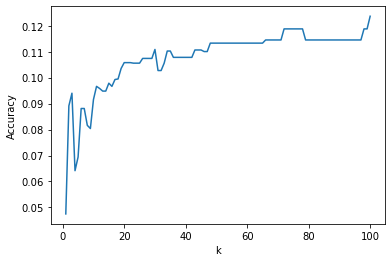

In [35]:
k_list = range(1,101)
accuracies = []

# k개 gridsearch
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train,y_train.values.ravel())
    accuracies.append(classifier.score(x_test,y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

In [36]:
knn2 = KNeighborsClassifier()
param = {'n_neighbors': np.arange(1, 211)}
knn_gscv = GridSearchCV(knn2, param, cv=5)
knn_gscv.fit(x_train, y_train.values.ravel())

/Users/unixking/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 18

In [37]:
knn_gscv.best_params_


{'n_neighbors': 202}

In [38]:
knn_gscv.best_score_

0.12688219913225224

In [39]:
knn2 = KNeighborsClassifier()
param = {'n_neighbors': np.arange(1, 211)}
knn_gscv = RandomizedSearchCV(knn2, param, cv=5)
knn_gscv.fit(x_train, y_train.values.ravel())

/Users/unixking/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189

In [41]:
knn_gscv.best_params_

{'n_neighbors': 197}

In [42]:
knn_gscv.best_score_

0.12636023306004693

In [40]:
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators': np.arange(100, 200)}
rf = RandomForestClassifier(oob_score=True, random_state=123456)
random_gscv = GridSearchCV(rf, param, cv=5)
random_gscv.fit(x_train, y_train.values.ravel())


/Users/unixking/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=123456),
             param_grid={'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])})

In [43]:
random_gscv.best_params_

{'n_estimators': 100}

In [44]:
random_gscv.best_score_

0.1272302900833639

In [47]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [48]:
target =  data[['Global_Sales']].values #y
features = data[['Platform','Genre']] #X

In [49]:
preprocess = make_column_transformer((OneHotEncoder(), ['Platform', 'Genre'])) #OHE categorical features

In [50]:
preprocess

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Platform', 'Genre'])])

In [51]:
kmeans_features = preprocess.fit_transform(features).toarray()
kmeans_features

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

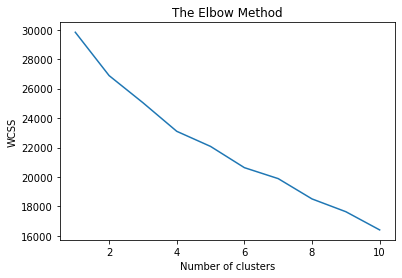

In [52]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(kmeans_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

In [53]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(kmeans_features)
features = features.assign(Kmeans_labels=pd.Series(y_kmeans, index=features.index))

In [59]:
features = features.assign(Kmeans_labels=pd.Series(y_kmeans, index=features.index))
features["Kmeans_labels"].unique()
kgroup0 = features[features["Kmeans_labels"] == 0]
kgroup1 = features[features["Kmeans_labels"] == 1]
kgroup0

,Platform,Genre,Kmeans_labels
0,Wii,10,0
1,NES,4,0
2,Wii,6,0
3,Wii,10,0
4,GB,7,0
...,...,...,...
16410,PS2,6,0
16412,X360,10,0
16413,PSV,1,0
16414,GBA,4,0


In [57]:
le,k0Platform_count = np.unique(kgroup0["Platform"], return_counts=True)
uniq_cnt_Platform = dict(zip(le, k0Platform_count))
uniq_cnt_Platform

{'2600': 61,
 '3DO': 3,
 '3DS': 325,
 'DC': 49,
 'DS': 1789,
 'GB': 91,
 'GBA': 624,
 'GC': 444,
 'GEN': 24,
 'GG': 1,
 'N64': 279,
 'NES': 85,
 'NG': 12,
 'PC': 786,
 'PCFX': 1,
 'PS': 1036,
 'PS2': 1782,
 'PS3': 933,
 'PS4': 249,
 'PSP': 976,
 'PSV': 280,
 'SAT': 170,
 'SCD': 6,
 'SNES': 227,
 'TG16': 2,
 'WS': 6,
 'Wii': 1057,
 'WiiU': 83,
 'X360': 915,
 'XB': 651,
 'XOne': 162}

In [58]:
le,k1Platform_count = np.unique(kgroup1["Platform"], return_counts=True)
uniq_cnt_Platform = dict(zip(le, k1Platform_count))
uniq_cnt_Platform

{'2600': 55,
 '3DS': 187,
 'DC': 3,
 'DS': 333,
 'GB': 6,
 'GBA': 162,
 'GC': 98,
 'GEN': 3,
 'N64': 37,
 'NES': 13,
 'PC': 166,
 'PS': 154,
 'PS2': 345,
 'PS3': 373,
 'PS4': 144,
 'PSP': 217,
 'PSV': 149,
 'SAT': 3,
 'SNES': 12,
 'Wii': 229,
 'WiiU': 64,
 'X360': 317,
 'XB': 152,
 'XOne': 85}